In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        1
1             4.9          3.0        1
2             4.7          3.2        1
3             4.6          3.1        1
4             5.0          3.6        1
5             5.4          3.9        1
6             4.6          3.4        1
7             5.0          3.4        1
8             4.4          2.9        1
9             4.9          3.1        1
10            5.4          3.7        1
11            4.8          3.4        1
12            4.8          3.0        1
13            4.3          3.0        1
14            5.8          4.0        1
15            5.7          4.4        1
16            5.4          3.9        1
17            5.1          3.5        1
18            5.7          3.8        1
19            5.1          3.8        1
20            5.4          3.4        1
21            5.1          3.7        1
22            4.6          3.6        1
23            5.1          3.3        1


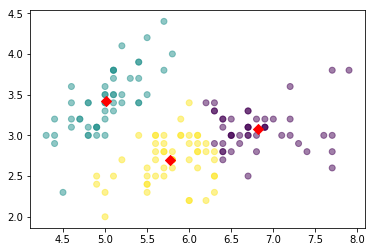

In [6]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [7]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         0  50   0
1        12   0  38
2        35   0  15


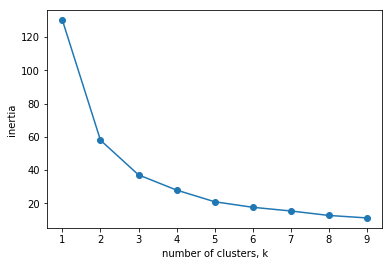

In [8]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()